In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Hyperparameters
input_size = 784  # 28x28 images
hidden_size = 500
output_size = 10  # 10 classes for MNIST
num_epochs = 500
batch_size = 64
learning_rate = 0.1
momentum = 0.9

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Split dataset into training and validation sets (8:2)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network




In [2]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [3]:
def train(b,num_epochs):
    model = NeuralNet(input_size, hidden_size, output_size).to("cuda")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum) 
    train_errors = []
    val_errors = []  
    for epoch in range(num_epochs):
        # print(f"Epoch {epoch+1}/{num_epochs}")
        model.train()
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.view(-1, 28*28).to("cuda")
            outputs = model(images)
            labels = labels.to("cuda")
            # print(outputs.device)
            # print(labels.device)
            loss = criterion(outputs, labels)
            loss = abs(loss-b)+b
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_error = 100 * (1 - correct / total)
        train_errors.append(train_error)
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.view(-1, 28*28).to("cuda")
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                labels = labels.to("cuda")
                # print(predicted.device)
                # print(labels.device)
                correct += (predicted == labels).sum().item()
        
        val_error = 100 * (1 - correct / total)
        val_errors.append(val_error)
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Error: {train_error:.2f}%, Validation Error: {val_error:.2f}%')
    plt.plot(train_errors, label='Train Error')
    plt.plot(val_errors, label='Validation Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error (%)')
    plt.legend()
    plt.savefig(f"train{b}.png")
    plt.show()


Epoch [1/50], Train Error: 23.03%, Validation Error: 19.35%
Epoch [2/50], Train Error: 19.68%, Validation Error: 19.60%
Epoch [3/50], Train Error: 18.28%, Validation Error: 11.82%
Epoch [4/50], Train Error: 15.60%, Validation Error: 19.89%
Epoch [5/50], Train Error: 21.47%, Validation Error: 16.72%
Epoch [6/50], Train Error: 15.42%, Validation Error: 24.75%
Epoch [7/50], Train Error: 19.88%, Validation Error: 17.23%
Epoch [8/50], Train Error: 19.85%, Validation Error: 19.34%
Epoch [9/50], Train Error: 18.18%, Validation Error: 12.49%
Epoch [10/50], Train Error: 13.49%, Validation Error: 13.78%
Epoch [11/50], Train Error: 13.75%, Validation Error: 13.12%
Epoch [12/50], Train Error: 13.95%, Validation Error: 20.41%
Epoch [13/50], Train Error: 13.21%, Validation Error: 12.47%
Epoch [14/50], Train Error: 15.36%, Validation Error: 16.41%
Epoch [15/50], Train Error: 17.23%, Validation Error: 19.37%
Epoch [16/50], Train Error: 23.30%, Validation Error: 28.23%
Epoch [17/50], Train Error: 29.57

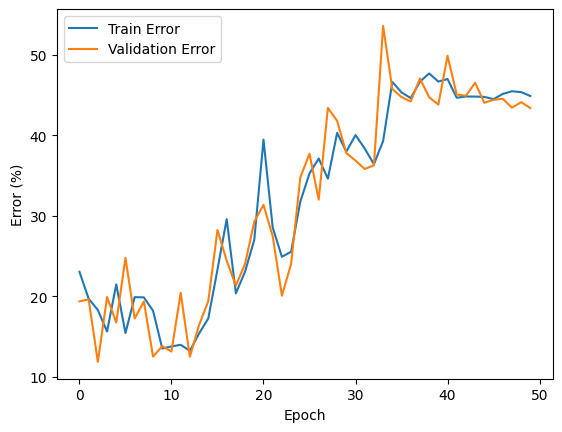

Epoch [1/50], Train Error: 21.52%, Validation Error: 15.08%
Epoch [2/50], Train Error: 14.25%, Validation Error: 12.09%
Epoch [3/50], Train Error: 16.47%, Validation Error: 16.42%
Epoch [4/50], Train Error: 14.86%, Validation Error: 13.71%
Epoch [5/50], Train Error: 13.80%, Validation Error: 14.20%
Epoch [6/50], Train Error: 15.78%, Validation Error: 24.47%
Epoch [7/50], Train Error: 21.51%, Validation Error: 19.34%
Epoch [8/50], Train Error: 20.06%, Validation Error: 13.48%
Epoch [9/50], Train Error: 20.32%, Validation Error: 18.05%
Epoch [10/50], Train Error: 16.13%, Validation Error: 14.96%
Epoch [11/50], Train Error: 14.79%, Validation Error: 19.41%
Epoch [12/50], Train Error: 21.09%, Validation Error: 18.73%
Epoch [13/50], Train Error: 18.96%, Validation Error: 16.86%
Epoch [14/50], Train Error: 20.51%, Validation Error: 34.05%
Epoch [15/50], Train Error: 31.21%, Validation Error: 35.44%
Epoch [16/50], Train Error: 31.34%, Validation Error: 37.79%
Epoch [17/50], Train Error: 32.86

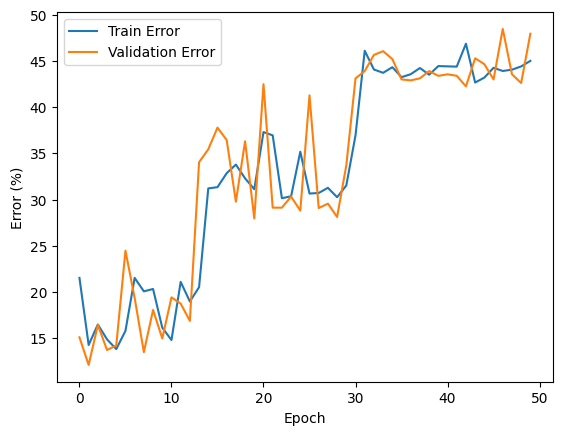

Epoch [1/50], Train Error: 20.19%, Validation Error: 14.84%
Epoch [2/50], Train Error: 19.14%, Validation Error: 14.84%
Epoch [3/50], Train Error: 16.66%, Validation Error: 22.59%
Epoch [4/50], Train Error: 22.54%, Validation Error: 28.08%
Epoch [5/50], Train Error: 19.14%, Validation Error: 22.56%
Epoch [6/50], Train Error: 18.14%, Validation Error: 18.17%
Epoch [7/50], Train Error: 16.67%, Validation Error: 15.11%
Epoch [8/50], Train Error: 21.57%, Validation Error: 20.57%
Epoch [9/50], Train Error: 19.53%, Validation Error: 24.16%
Epoch [10/50], Train Error: 24.14%, Validation Error: 19.30%
Epoch [11/50], Train Error: 27.71%, Validation Error: 15.28%
Epoch [12/50], Train Error: 19.29%, Validation Error: 17.46%
Epoch [13/50], Train Error: 23.40%, Validation Error: 19.85%
Epoch [14/50], Train Error: 23.96%, Validation Error: 23.22%
Epoch [15/50], Train Error: 24.95%, Validation Error: 30.36%
Epoch [16/50], Train Error: 33.48%, Validation Error: 26.68%
Epoch [17/50], Train Error: 33.97

In [4]:
b = [0.17,0.18,0.19]
for i in b:
    train(i,50)